<a href="https://colab.research.google.com/github/CastanharoA/Page--AMFCorreia/blob/b3_castan/Unica_teia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. How has the stock price changed over time?


In this section, we will see how to handle requesting stock information with pandas and how to analyze the basic attributes of a stock.

In [118]:
!pip install -q yfinance

In [119]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# Defina os símbolos das ações específicas que você deseja analisar
stock_symbols = ['ITUB4.SA' ,'BBDC4.SA', 'BBAS3.SA', 'BPAC11.SA']

# Defina as datas de início e fim
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Baixe os dados das ações específicas
stock_data = yf.download(stock_symbols, start=start, end=end)

# Exiba os últimos 10 registros dos dados das ações
print(stock_data.tail(3))


[*********************100%%**********************]  4 of 4 completed
            Adj Close                                     Close           \
             BBAS3.SA BBDC4.SA  BPAC11.SA   ITUB4.SA   BBAS3.SA BBDC4.SA   
Date                                                                       
2023-11-03  50.099998    14.77  31.969999  27.930000  50.099998    14.77   
2023-11-06  50.450001    14.76  32.209999  28.190001  50.450001    14.76   
2023-11-07  51.020000    15.15  32.849998  28.980000  51.020000    15.15   

                                       High           ...        Low  \
            BPAC11.SA   ITUB4.SA   BBAS3.SA BBDC4.SA  ...  BPAC11.SA   
Date                                                  ...              
2023-11-03  31.969999  27.930000  50.459999    14.88  ...  30.129999   
2023-11-06  32.209999  28.190001  50.650002    14.89  ...  31.500000   
2023-11-07  32.849998  28.980000   0.000000     0.00  ...   0.000000   

                            Open         

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list =  ['ITUB4.SA' ,'BBDC4.SA', 'BBAS3.SA', 'BPAC11.SA']

# Set up End and Start times for data grab
tech_list =  ['ITUB4.SA' ,'BBDC4.SA', 'BBAS3.SA', 'BPAC11.SA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

import pandas_datareader.data as web
ITUB4 = web.get_data_yahoo('ITUB4.SA')
BBDC4= web.get_data_yahoo('BBDC4.SA')
BBAS3 = web.get_data_yahoo('BBAS3.SA')
BPAC11 = web.get_data_yahoo('BPAC11.SA')

company_list =  [ITUB4 ,BBDC4, BBAS3, BPAC11]
company_name =  ['ITUB4.SA' ,'BBDC4.SA', 'BBAS3.SA', 'BPAC11.SA']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Exiba os últimos 10 registros dos dados da ação
print(stock_data.tail(10))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
            Adj Close                                       Close           \
             BBAS3.SA   BBDC4.SA  BPAC11.SA   ITUB4.SA   BBAS3.SA BBDC4.SA   
Date            

Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [121]:
# Summary Stats
import pandas_datareader.data as web

# TUB4 = web.get_data_yahoo('ITUB4.SA')
# BBDC4= web.get_data_yahoo('BBDC4.SA')
# BBAS3 = web.get_data_yahoo('BBAS3.SA')
# BPAC1 = web.get_data_yahoo('BPAC1.SA')

ITUB4.describe()
# BBDC4.describe()
# BBAS3.describe()
# ITUB4.describe()
# BPAC11.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5738.000000,5738.000000,5738.000000,5738.000000,5738.000000,5.738000e+03
mean,16.878475,17.099738,16.647284,16.880108,12.641023,4.386684e+07
std,9.415017,9.521114,9.301169,9.407363,8.965086,6.873553e+07
min,0.000000,0.000000,0.000000,1.920716,1.105516,0.000000e+00
25%,10.549453,10.722897,10.319091,10.555662,6.075578,1.334583e+07
50%,16.056849,16.250028,15.820640,16.054230,9.895708,2.166022e+07
75%,24.376666,24.700001,24.038334,24.340000,21.024739,4.258832e+07
max,38.669998,39.790001,38.400002,39.689999,33.115944,1.679561e+09


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data  PERIODO  2000-12-21 to 2023-11-07
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [122]:
# General info
import pandas_datareader.data as web
ITUB4 = web.get_data_yahoo('ITUB4.SA')

ITUB4.info()
#2000-12-21 to 2023-11-07

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5738 entries, 2000-12-21 to 2023-11-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5738 non-null   float64
 1   High       5738 non-null   float64
 2   Low        5738 non-null   float64
 3   Close      5738 non-null   float64
 4   Adj Close  5738 non-null   float64
 5   Volume     5738 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 313.8 KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

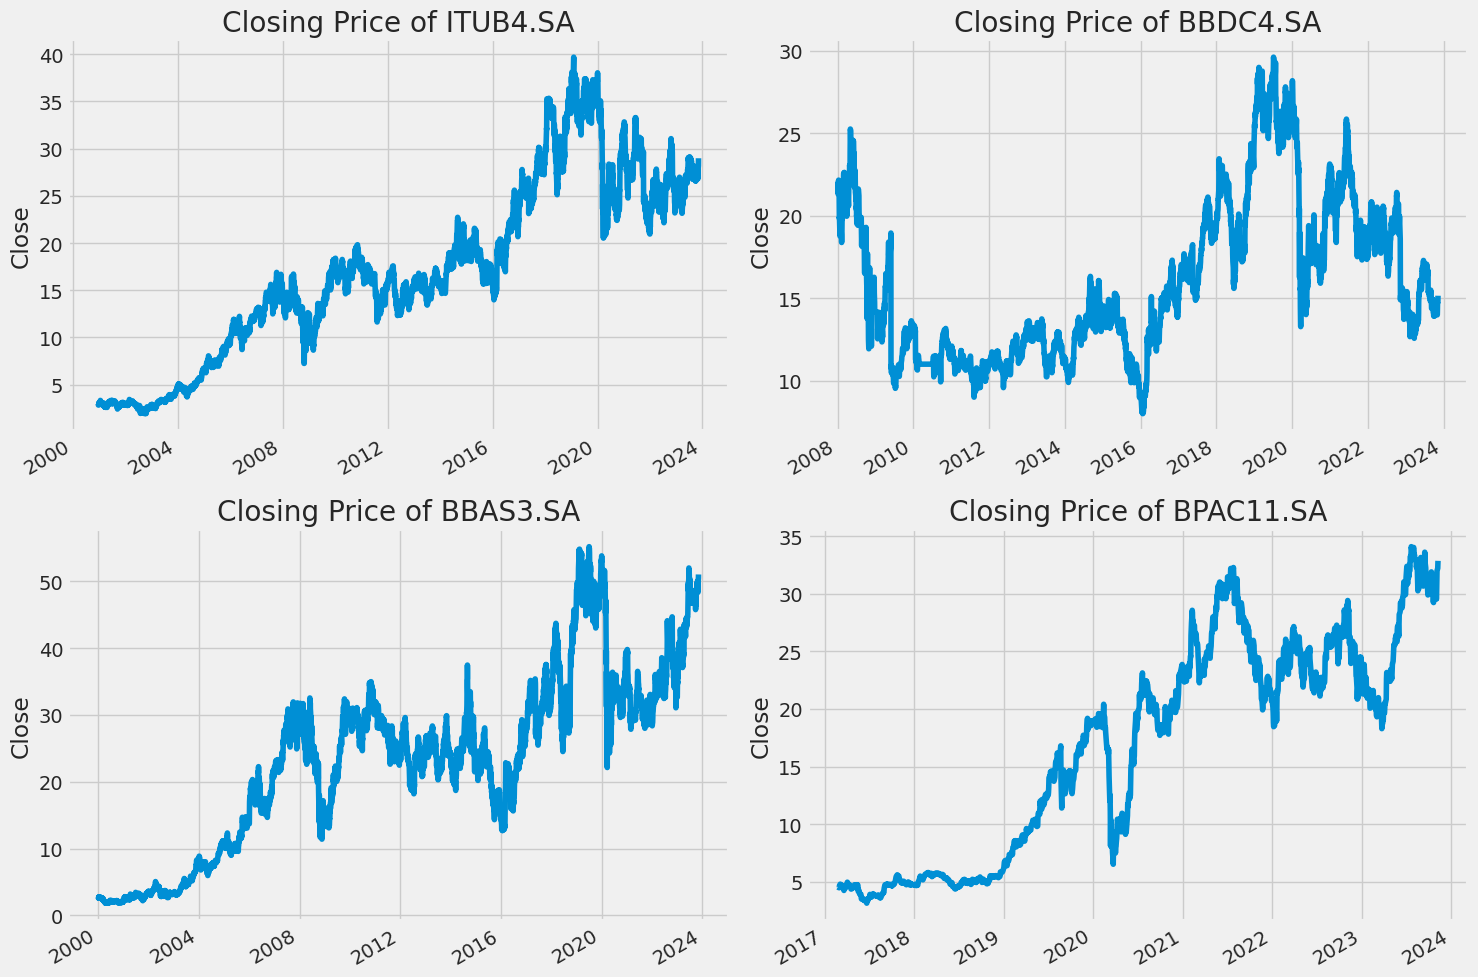

In [123]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

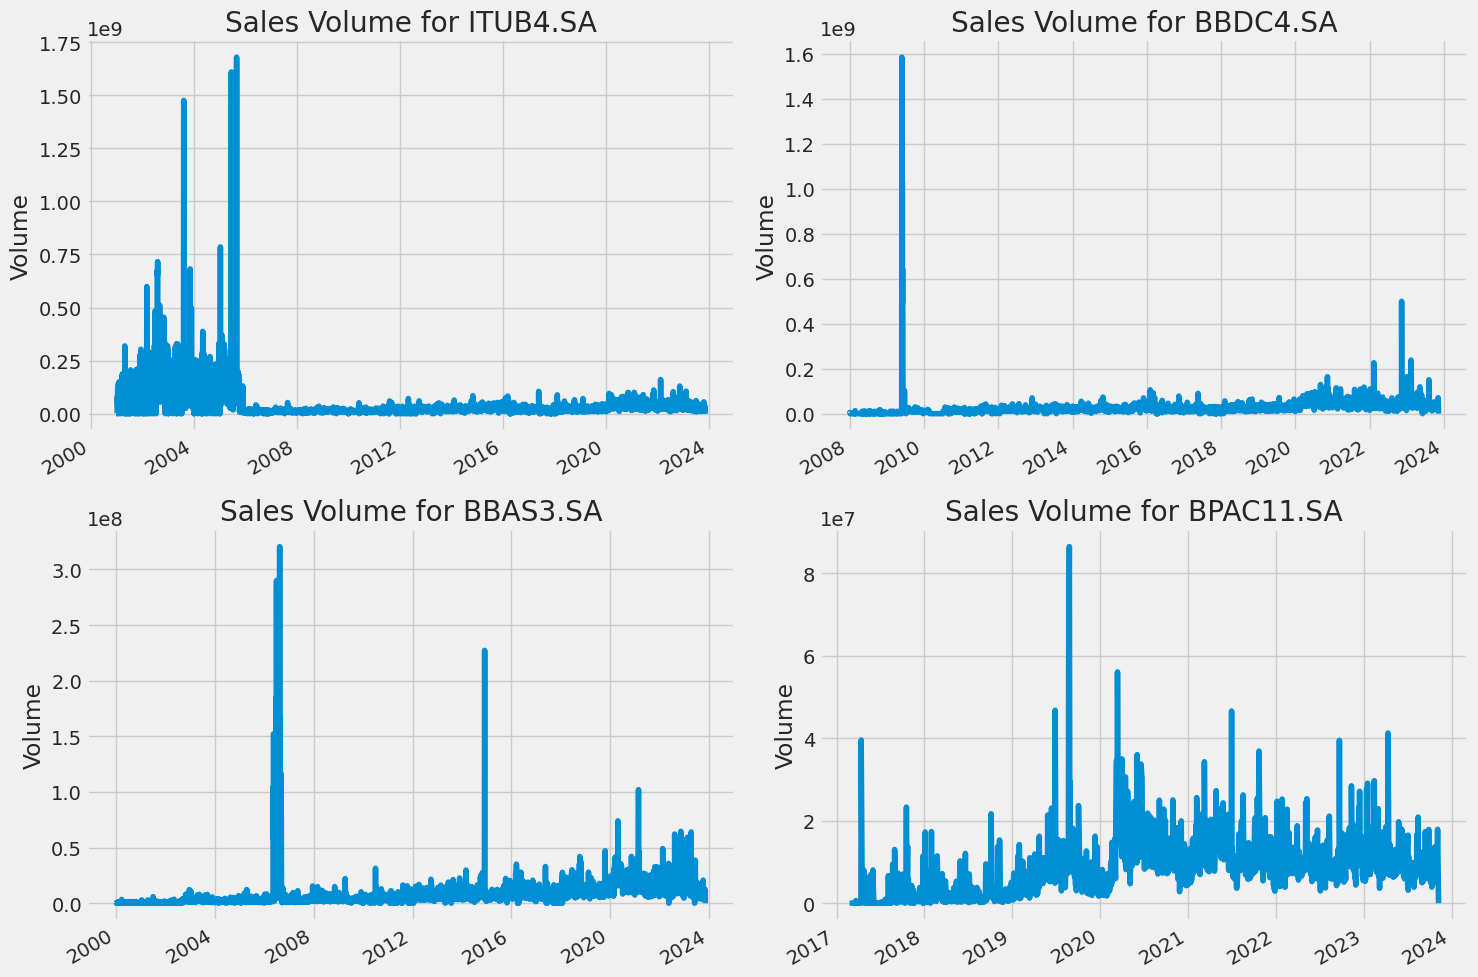

In [124]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks? ma_day = [10, 20, 50]


The moving average (MA) is a simple technical analysis tool that smoothes price data by creating a constantly updated average price. The average is taken over a specific time period, such as 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


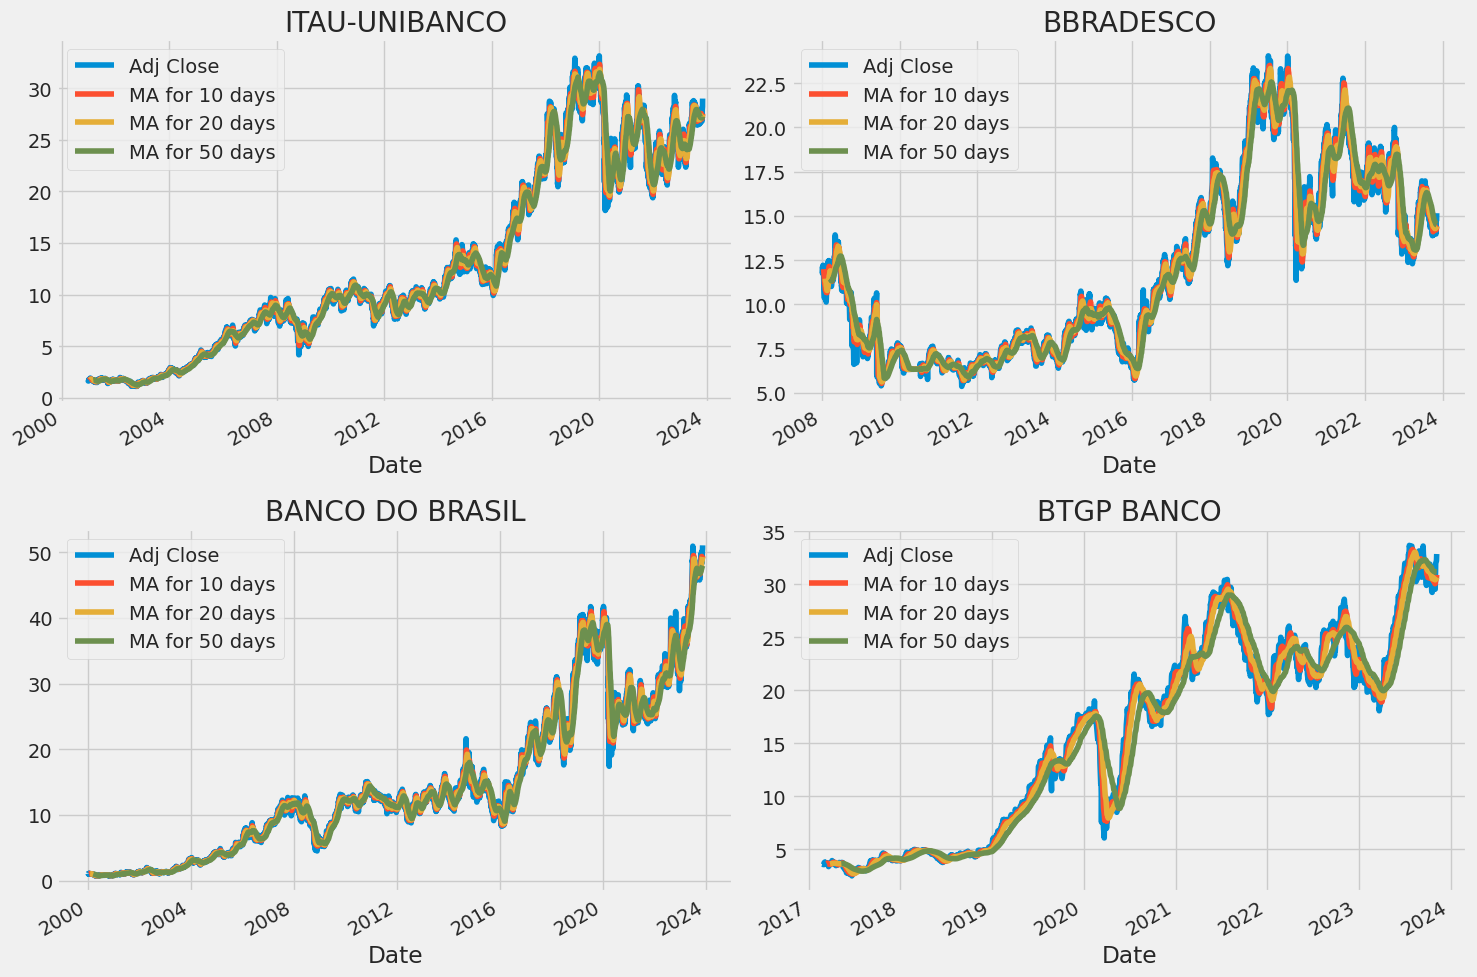

In [125]:

import pandas_datareader.data as web
ITUB4 = web.get_data_yahoo('ITUB4.SA')
BBDC4= web.get_data_yahoo('BBDC4.SA')
BBAS3 = web.get_data_yahoo('BBAS3.SA')
BPAC11 = web.get_data_yahoo('BPAC11.SA')

company_list =  [ITUB4 ,BBDC4, BBAS3, BPAC11]
company_name =  ['ITUB4.SA' ,'BBDC4.SA', 'BBAS3.SA', 'BPAC11.SA']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name




ma_day = [10, 20, 50]

for company in company_list:
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)


ITUB4[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ITAU-UNIBANCO')

BBDC4[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('BBRADESCO')

BBAS3[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BANCO DO BRASIL')

BPAC11[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('BTGP BANCO')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

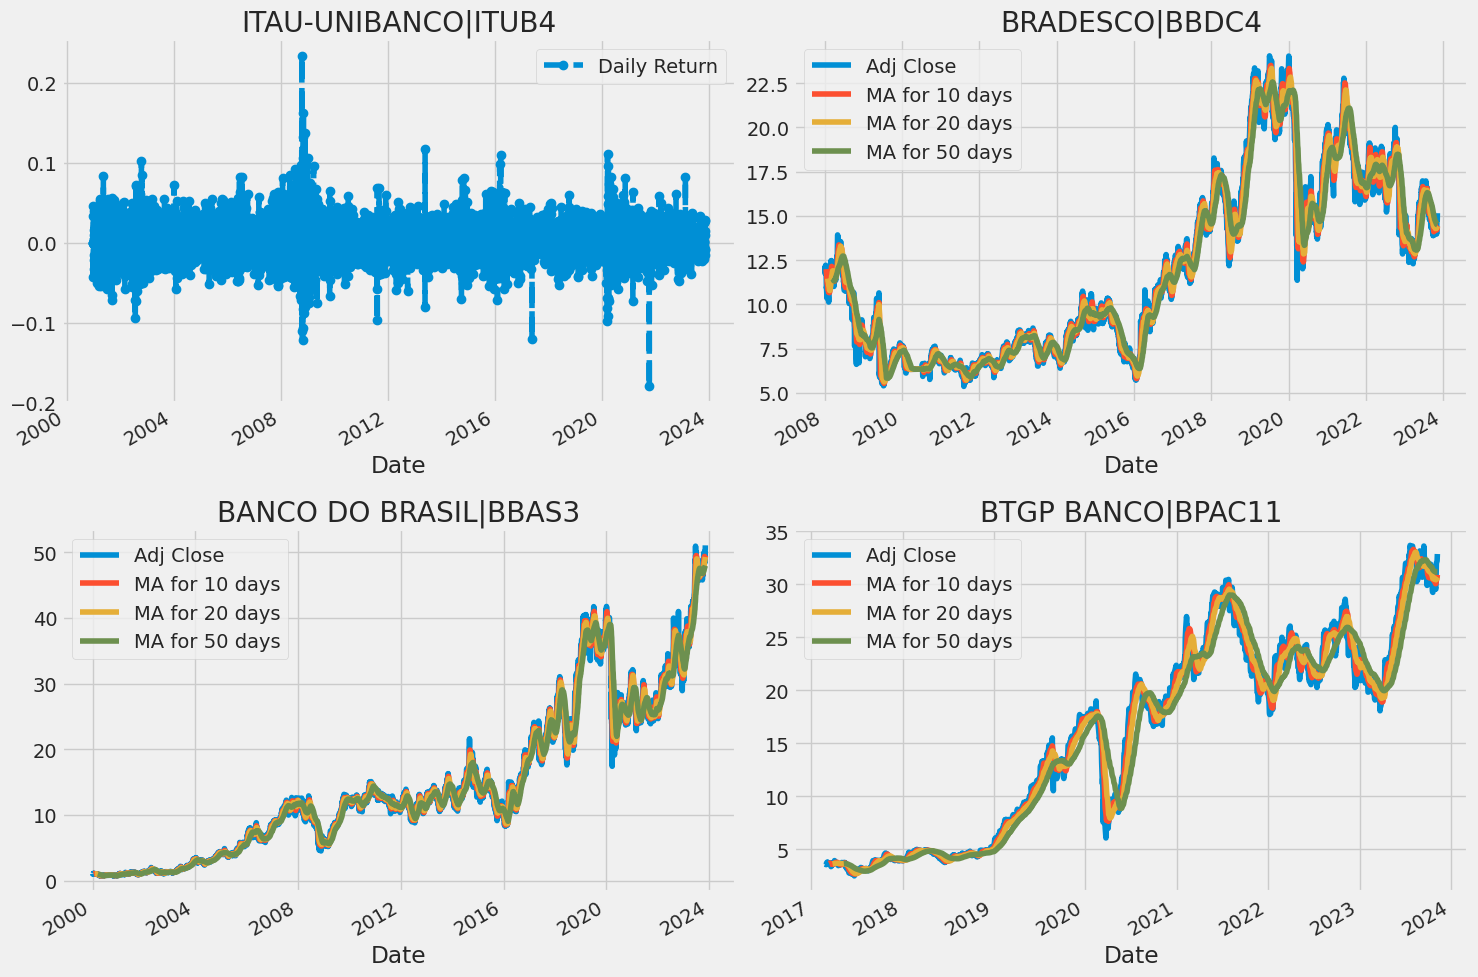

In [126]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ITUB4['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('ITAU-UNIBANCO|ITUB4')

BBDC4[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('BRADESCO|BBDC4')

BBAS3[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BANCO DO BRASIL|BBAS3')

BPAC11[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('BTGP BANCO|BPAC11')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

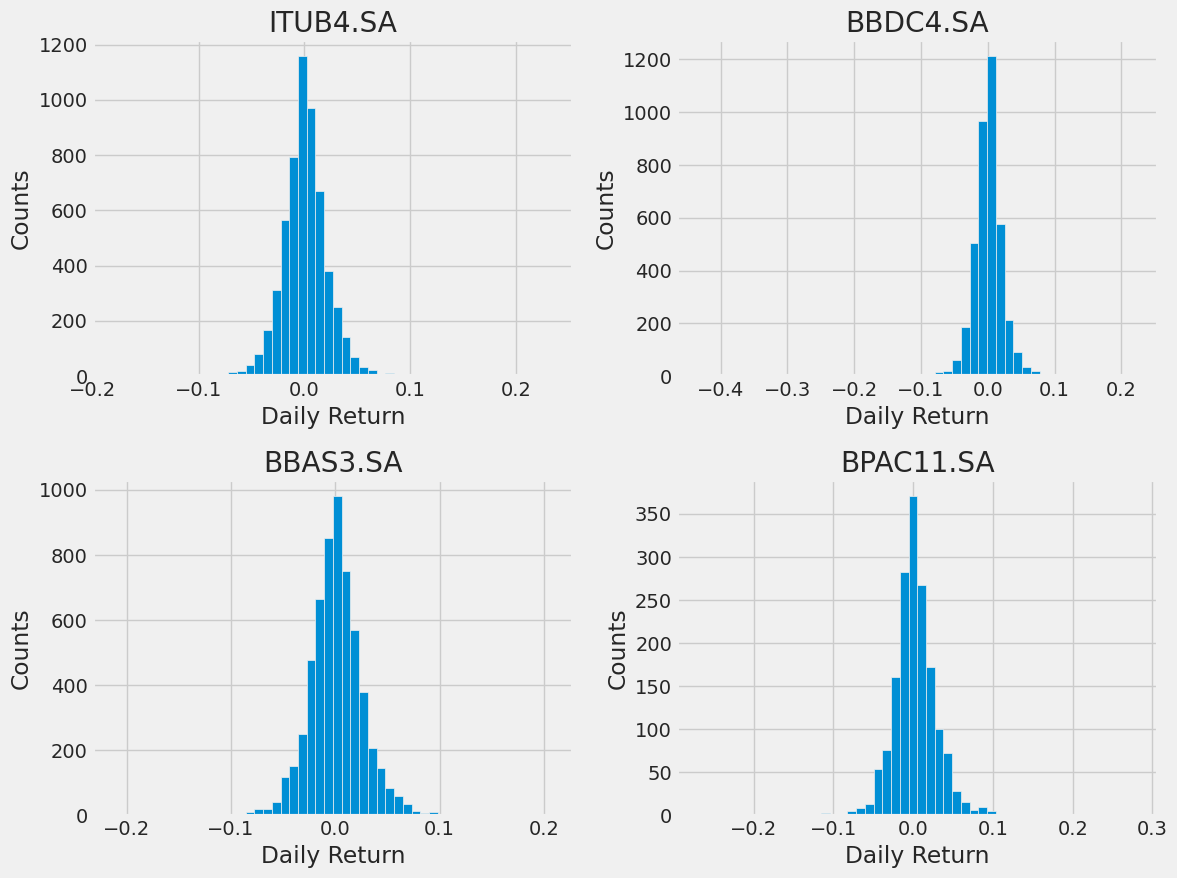

In [127]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')



plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [128]:
# Grab all the closing prices for the tech stock list into one DataFrame
from pandas_datareader import data as pdr

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,BBAS3.SA,BBDC4.SA,BPAC11.SA,ITUB4.SA
Date,,,,
2022-11-08,NaN,NaN,NaN,NaN
2022-11-09,-0.026530,-0.173843,-0.016766,-0.048022
2022-11-10,-0.019698,-0.029316,-0.071758,-0.018827
2022-11-11,-0.022296,0.016778,-0.017604,-0.032223
2022-11-14,0.024775,0.000660,0.022594,-0.002993


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

[*********************100%%**********************]  1 of 1 completed


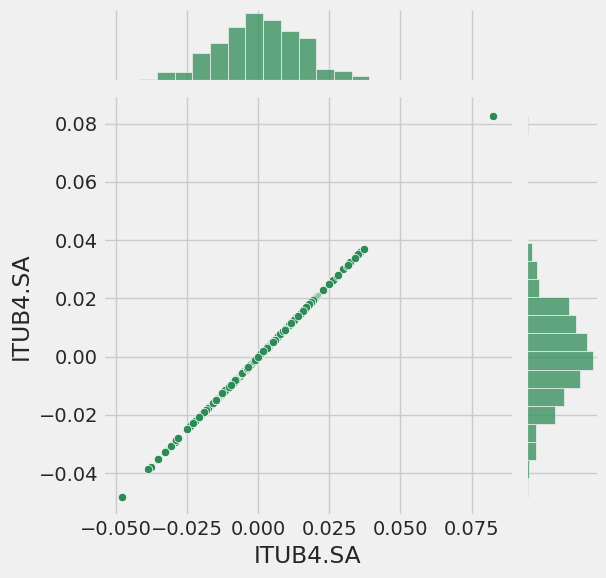

In [129]:
# Compar to itself should show a perfectly linear relationship
import pandas_datareader.data as web
ITUB4 = web.get_data_yahoo('ITUB4.SA')

sns.jointplot(x='ITUB4.SA', y='ITUB4.SA', data=tech_rets, kind='scatter', color='seagreen')

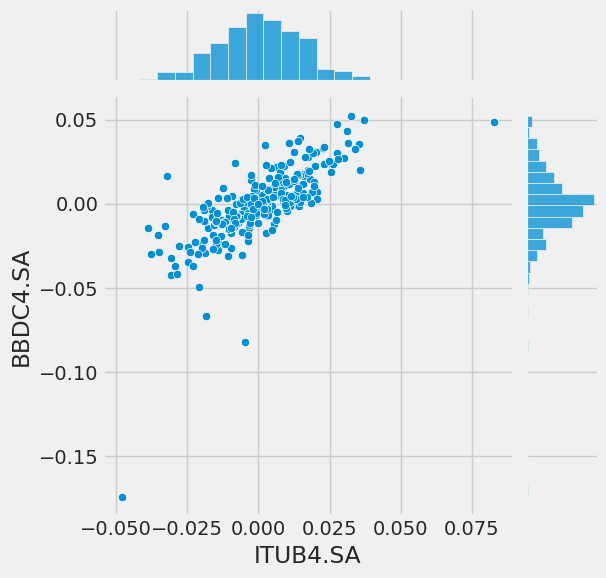

In [130]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='ITUB4.SA', y='BBDC4.SA', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

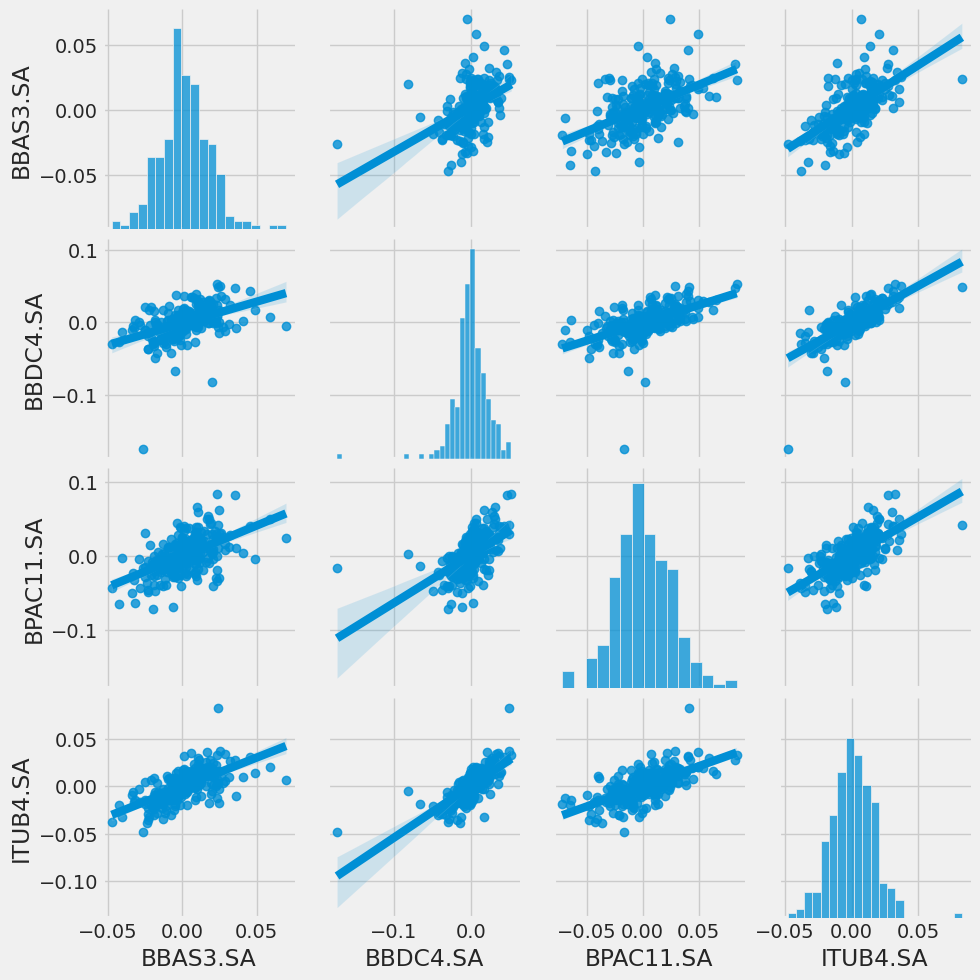

In [131]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

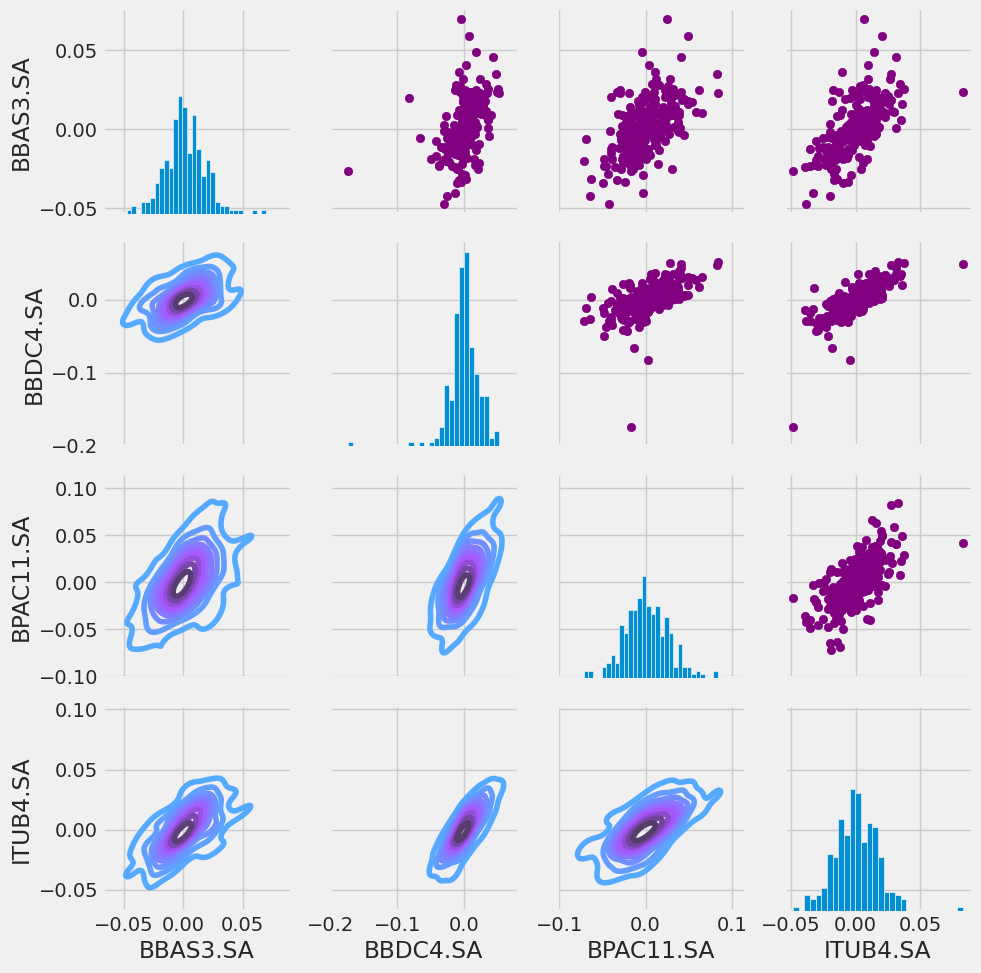

In [132]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

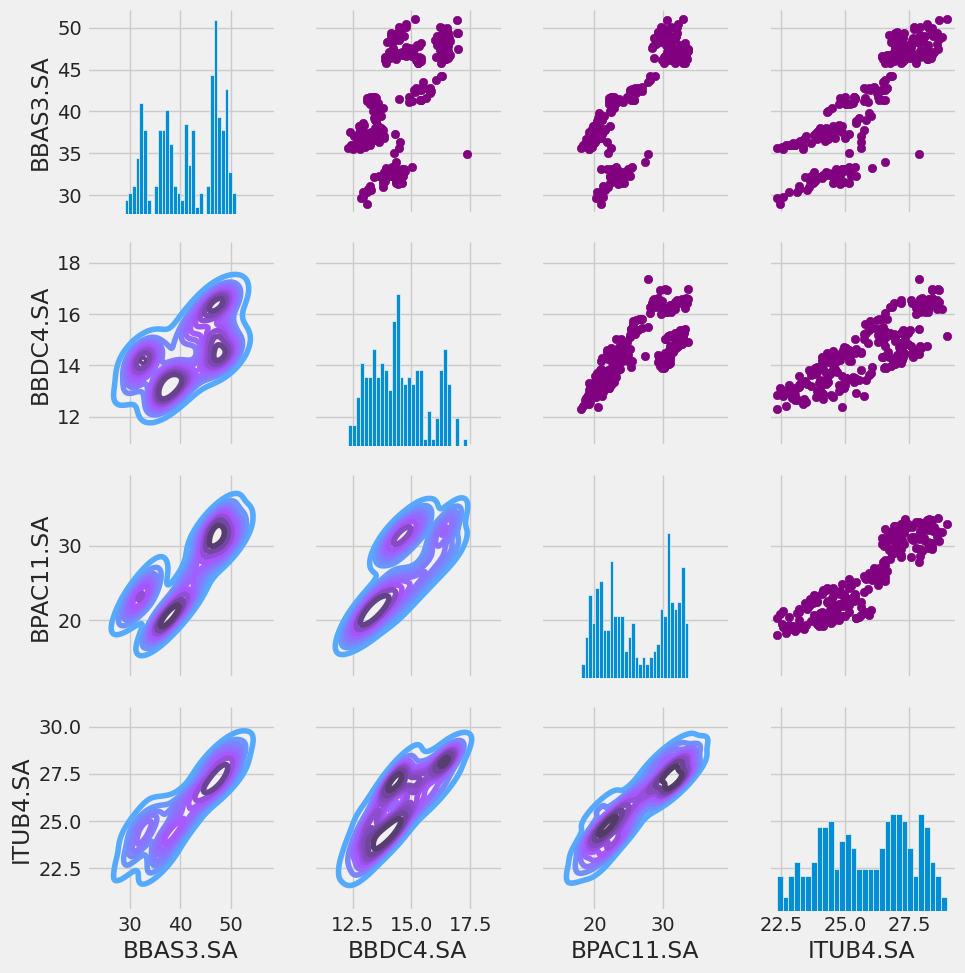

In [133]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

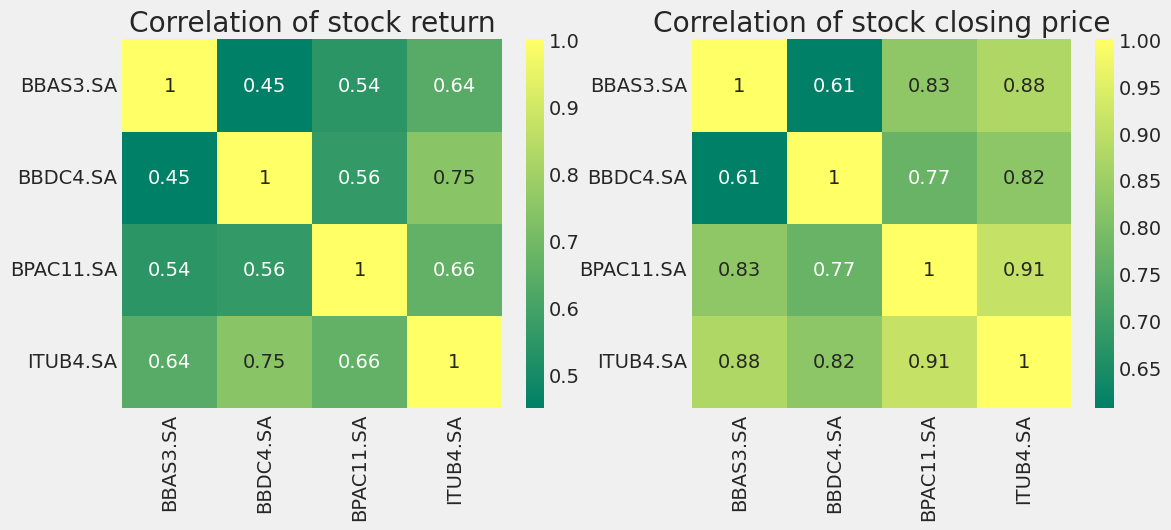

In [134]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

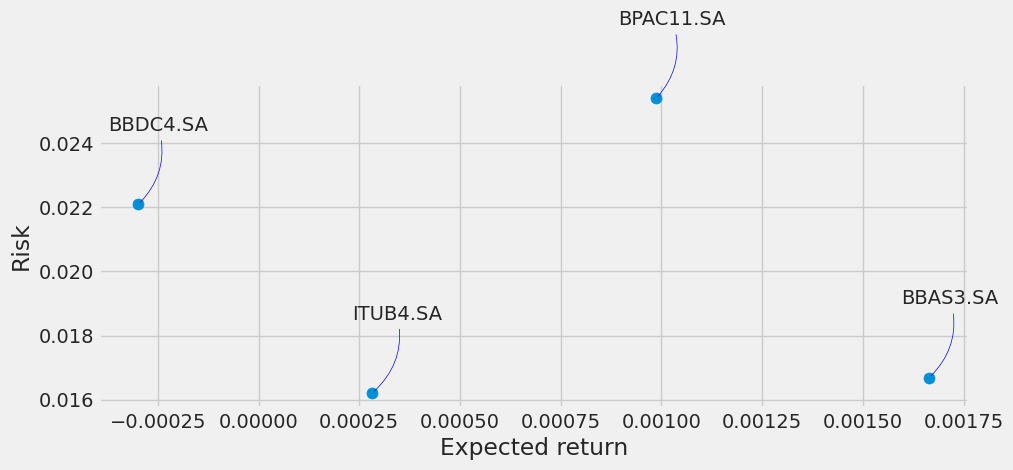

In [135]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10,4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc: start='2013-01-01', end=datetime.now()) df  start='2013-10-01', end='2023-11-07

In [136]:
# Get the stock quote
import pandas_datareader.data as web
ITUB4 = web.get_data_yahoo('ITUB4.SA')
BBDC4= web.get_data_yahoo('BBDC4.SA')
BBAS3 = web.get_data_yahoo('BBAS3.SA')
BPAC11 = web.get_data_yahoo('BPAC11.SA')


#start='2013-10-01', end='2023-10-01
from pandas_datareader import data as pdr
#df = pdr.get_data_yahoo('ITUB4.SA', start='2013-01-01', end=datetime.now())
df = pdr.get_data_yahoo('ITUB4.SA', start='2013-10-01', end='2023-11-07')
#
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,15.787628,15.962935,15.507137,15.902829,10.307059,18343442
2013-10-02,15.852742,16.008015,15.817680,15.837716,10.264856,16081408
2013-10-03,15.857751,15.932882,15.752566,15.877786,10.290829,13297887
2013-10-04,15.827698,16.038067,15.742549,15.902829,10.307059,11438148
2013-10-07,15.867768,15.992987,15.727523,15.832707,10.261612,12555389
...,...,...,...,...,...,...
2023-10-30,27.490000,27.490000,26.990000,27.080000,27.062180,15110200
2023-10-31,27.080000,27.180000,26.660000,26.820000,26.802349,25392800
2023-11-01,26.900000,27.340000,26.860001,27.180000,27.180000,26217000


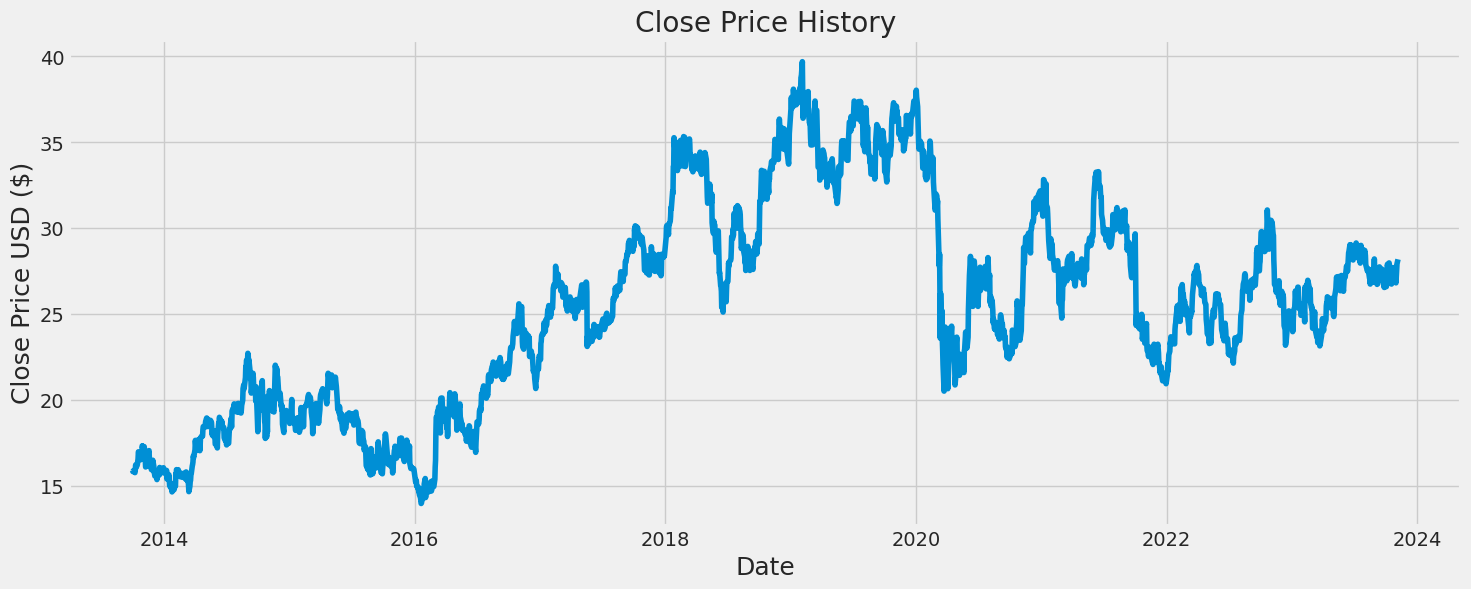

In [137]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [138]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2384

In [139]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.07472372],
       [0.07219095],
       [0.07374958],
       ...,
       [0.51338453],
       [0.54255812],
       [0.55267164]])

In [140]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.07472372, 0.07219095, 0.07374958, 0.07472372, 0.07199612,
       0.06985293, 0.07647722, 0.08738779, 0.08134802, 0.08582916,
       0.08836193, 0.09557068, 0.10102604, 0.11700223, 0.11096239,
       0.11446938, 0.1055071 , 0.10238984, 0.09907767, 0.10667608,
       0.13044558, 0.12810756, 0.12986109, 0.12343166, 0.12849729,
       0.11739182, 0.10940376, 0.09966216, 0.08271182, 0.0854395 ,
       0.08446536, 0.09712931, 0.11076756, 0.11972984, 0.10200018,
       0.09537593, 0.08582916, 0.07647722, 0.07959456, 0.09615524,
       0.0903103 , 0.0979087 , 0.0838808 , 0.06985293, 0.06732011,
       0.06205969, 0.06848912, 0.07433407, 0.07043745, 0.05407156,
       0.05913719, 0.06147517, 0.0634235 , 0.06420281, 0.06790464,
       0.08154285, 0.06673563, 0.06926844, 0.07355475, 0.07180125])]
[0.08095836102714915]

[array([0.07472372, 0.07219095, 0.07374958, 0.07472372, 0.07199612,
       0.06985293, 0.07647722, 0.08738779, 0.08134802, 0.08582916,
       0.08836193, 0.09557068, 0.10

In [141]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()  # 128evita overl ifiting
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1))) # univariada
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2324/2324 [==============================] - 117s 49ms/step - loss: 0.0021


In [142]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 36ms/step


0.6407607317922237

<ipython-input-143-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


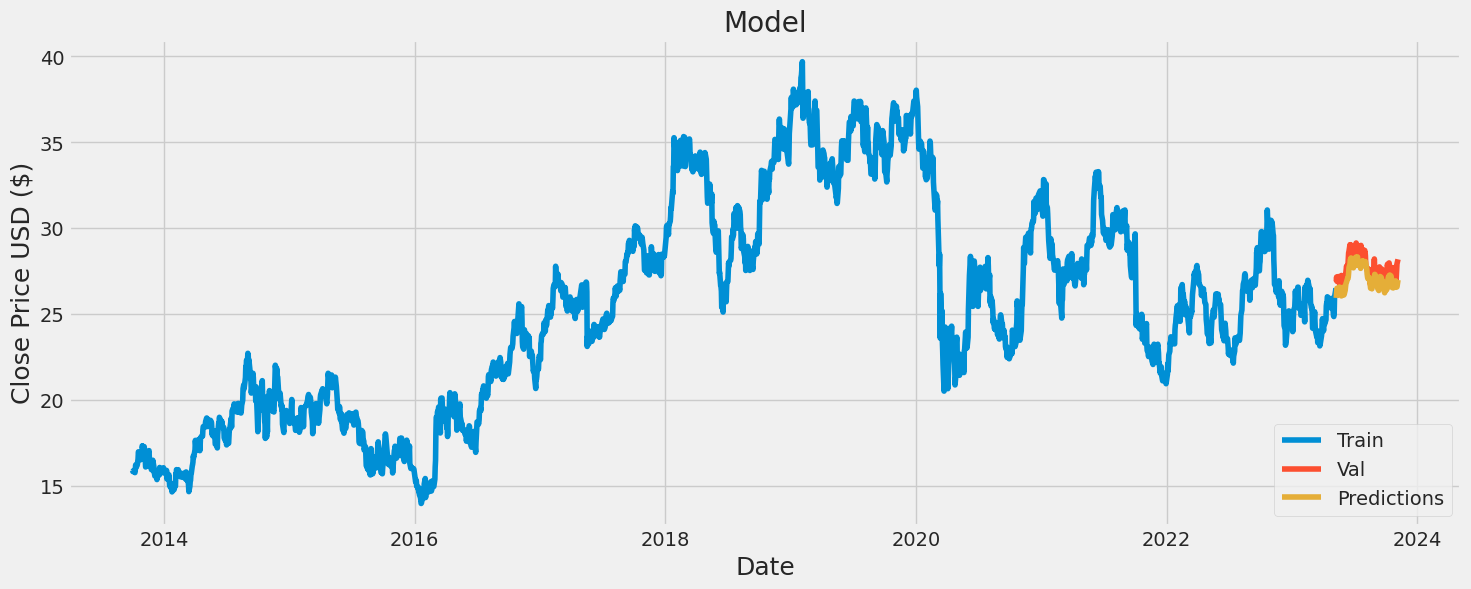

In [143]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [144]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-05-10,26.900000,25.944967
2023-05-11,27.160000,26.247370
2023-05-12,26.910000,26.501528
2023-05-15,27.010000,26.503054
2023-05-16,26.920000,26.495285
...,...,...
2023-10-30,27.080000,26.932642
2023-10-31,26.820000,26.788906
2023-11-01,27.180000,26.562830


In [145]:
# NAO ESCREVER FIM

# StOCK DEFINITION

"Stock prices" (preços de ações) referem-se ao valor de uma unidade de ação de uma empresa negociada em uma bolsa de valores em um determinado momento. As ações representam uma participação de propriedade em uma empresa, e os preços das ações podem flutuar com base em uma série de fatores, incluindo a oferta e a demanda do mercado, o desempenho financeiro da empresa, notícias econômicas e eventos relacionados à empresa.

Aqui estão alguns conceitos importantes relacionados aos preços das ações:

1. **Cotação**: A cotação de uma ação é o preço atual pelo qual ela está sendo negociada no mercado. As cotações das ações podem variar ao longo do dia, pois são influenciadas pela atividade de compra e venda.

2. **Mercado de Ações**: O mercado de ações é onde as ações são compradas e vendidas. Existem diferentes bolsas de valores em todo o mundo, como a Bolsa de Valores de Nova Iorque (NYSE) e a NASDAQ nos Estados Unidos, onde as ações de empresas são negociadas.

3. **Volume de Negociação**: O volume de negociação é o número de ações que são compradas e vendidas durante um determinado período de tempo. Um alto volume de negociação indica uma atividade significativa no mercado.

4. **Preço de Fechamento**: O preço de fechamento é o preço de uma ação no momento em que o mercado fecha. Ele é frequentemente usado como referência para o desempenho diário das ações.

5. **Histórico de Preços**: O histórico de preços de ações mostra como os preços das ações de uma empresa têm variado ao longo do tempo. Isso pode ser usado para análise técnica e fundamental, bem como para tomada de decisões de investimento.

6. **Dividendos**: Algumas empresas distribuem dividendos aos acionistas, que representam uma parte dos lucros da empresa. O pagamento de dividendos pode afetar o retorno total do investimento em ações.

Os preços das ações são acompanhados de perto por investidores, traders e analistas, pois fornecem informações cruciais sobre o desempenho das empresas e a saúde geral do mercado de ações. Eles desempenham um papel fundamental na tomada de decisões de investimento e na avaliação de riscos e oportunidades.

#INICIO decomposiçcão

In [146]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,15.787628,15.962935,15.507137,15.902829,10.307059,18343442
2013-10-02,15.852742,16.008015,15.817680,15.837716,10.264856,16081408
2013-10-03,15.857751,15.932882,15.752566,15.877786,10.290829,13297887
2013-10-04,15.827698,16.038067,15.742549,15.902829,10.307059,11438148
2013-10-07,15.867768,15.992987,15.727523,15.832707,10.261612,12555389


In [ ]:
'2023-11-07

In [72]:
colunas = ITUB4.columns
print(f'ITUB4: {colunas}')
data_inicio = ITUB4.index.min()
data_fim = ITUB4.index.max()

print(f'Data de início: {data_inicio}')
print(f'Data de fim: {data_fim}')

ITUB4: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Data de início: 2000-12-21 00:00:00
Data de fim: 2023-11-07 00:00:00


In [73]:
ITUB4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-21,2.815505,2.988535,2.815174,2.960552,1.704020,74224
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.630161,23312
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.630161,0
2000-12-26,2.816664,2.834712,2.790006,2.831401,1.629684,7851
2000-12-27,2.881074,2.927437,2.831401,2.927437,1.684960,26996


In [74]:
valid.head()

,Close,Predictions
Date,,
2023-04-27,25.790001,25.800808
2023-04-28,25.920000,25.923307
2023-05-02,24.900000,26.091919
2023-05-03,24.860001,25.840504
2023-05-04,25.059999,25.578295


In [75]:
# Get the stock quote
import pandas_datareader.data as web
ITUB4 = web.get_data_yahoo('ITUB4.SA')

#from pandas_datareader import data as pdr
#ITUB4_Y = pdr.get_data_yahoo('ITUB4.SA', start='2022-10-30', end='2023-10-30')

[*********************100%%**********************]  1 of 1 completed


In [76]:
# Get the stock quote
import pandas_datareader.data as web
#ITUB4 = web.get_data_yahoo('ITUB4.SA')



# PArametros

The Hjorth parameters, which include Activity, Mobility, and Complexity, are typically calculated directly from the original time series data, not from a predictive model. These parameters are used to characterize the statistical properties and dynamics of a time series signal.

Here's a brief description of each Hjorth parameter:

1. **Activity**: Activity, also known as Signal Energy, quantifies the total energy or power in the time series data. It is a measure of the overall strength or magnitude of the signal. To calculate Activity, you sum the squares of all the data points in the time series. A higher Activity value indicates a more active or energetic signal.

2. **Mobility**: Mobility characterizes how fast the signal changes or transitions. It is a measure of the frequency of the signal. Mobility is calculated by dividing the standard deviation of the first derivative of the time series by the standard deviation of the time series itself. A higher Mobility value suggests that the signal changes rapidly or has a higher frequency content.

3. **Complexity**: Complexity is a measure of how irregular or unpredictable the signal is. It quantifies the irregularity of the waveform. To calculate Complexity, you divide the standard deviation of the second derivative of the time series by the standard deviation of the first derivative. A higher Complexity value indicates a more irregular or complex signal.

These parameters are often used in biomedical signal analysis and other fields to assess the characteristics of signals, but they can be applied to various types of time series data.

You typically calculate these parameters using the original time series data, not the predictive model's output. They provide insights into the signal's underlying characteristics, which can be useful for a variety of applications, such as feature extraction, signal classification, or quality assessment. These parameters are not related to a specific predictive model like an LSTM model.

#HOJORT INICIO

In [147]:
df.info()  #2013-10-01 to 2023-11-06

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2509 entries, 2013-10-01 to 2023-11-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2509 non-null   float64
 1   High       2509 non-null   float64
 2   Low        2509 non-null   float64
 3   Close      2509 non-null   float64
 4   Adj Close  2509 non-null   float64
 5   Volume     2509 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.2 KB


In [148]:
# General info ##
import pandas_datareader.data as web
ITUB4 = web.get_data_yahoo('ITUB4.SA')

#ITUB4.info()
##2000-12-21 to 2023-11-07

[*********************100%%**********************]  1 of 1 completed


In [149]:
ITUB4_ = web.get_data_yahoo('itub4.SA', start='2013-10-01', end='2023-11-06')


[*********************100%%**********************]  1 of 1 completed


In [150]:
ITUB4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5738 entries, 2000-12-21 to 2023-11-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5738 non-null   float64
 1   High       5738 non-null   float64
 2   Low        5738 non-null   float64
 3   Close      5738 non-null   float64
 4   Adj Close  5738 non-null   float64
 5   Volume     5738 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 313.8 KB


In [151]:
colunas = ITUB4.columns
print(f' ITUB4: {colunas}')

 ITUB4: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


# nao estacionariedade

ADF Statistic: -1.5143775123096772

p-value: 0.5263873795741346
  

 A série NÃO é estacionária.  



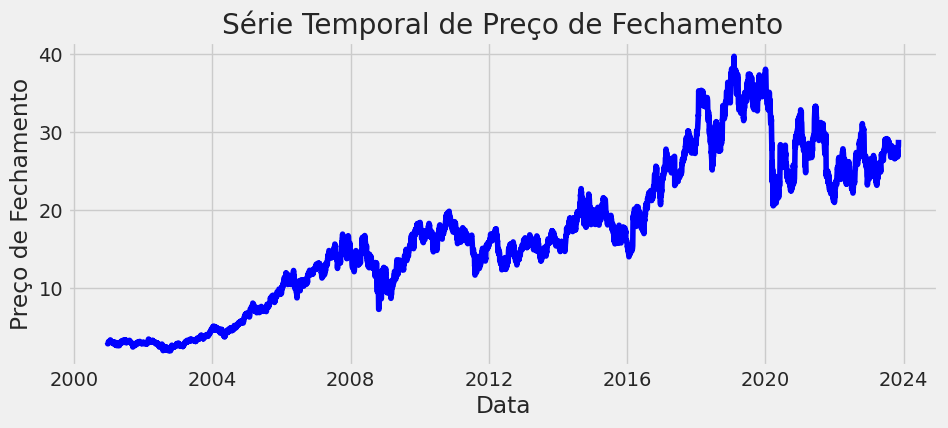

In [152]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


#close_prices = ibov_itub4_D["Close"]
##  SE RODAR DE NOVO RODAR A DATA DA BASE ( DO INICO)
#xibov_itub4= web.get_data_yahoo('itub4.SA', start='201x-10-01', end='20X3-10-01')

#close_prices = ibov_itub4_D["Close"]


# Plotar o gráfico de preços de fechamento ao longo do tempo
plt.figure(figsize=(10,4 ))
plt.plot(ITUB4['Close'], label='Preço de Fechamento', color='blue')
plt.title('Série Temporal de Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')

# Verificar a estacionaridade da série
result = adfuller(ITUB4['Close'])
print(f'ADF Statistic: {result[0]}\n' )
print(f'p-value: {result[1]}\n  \n')


if result[1] <= 0.05:
    print('n A série É estacionária.\n')
else:
    print( ' A série NÃO é estacionária.  \n')


# MOSTRAR COMO SERIA ESSA MESMA SERIA ESTACIONARIA

ADF Statistic: -1.5143775123096772

p-value: 0.5263873795741346
  

 A série NÃO é estacionária.  



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 5738
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2715.731
Date:                            Wed, 08 Nov 2023   AIC                           5441.462
Time:                                    00:58:55   BIC                           5474.725
Sample:                                         0   HQIC                          5453.041
                                           - 5738                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7081      0.082      8.649      0.000       0.548       0.869
ma.L1         -0.7416      0.077   

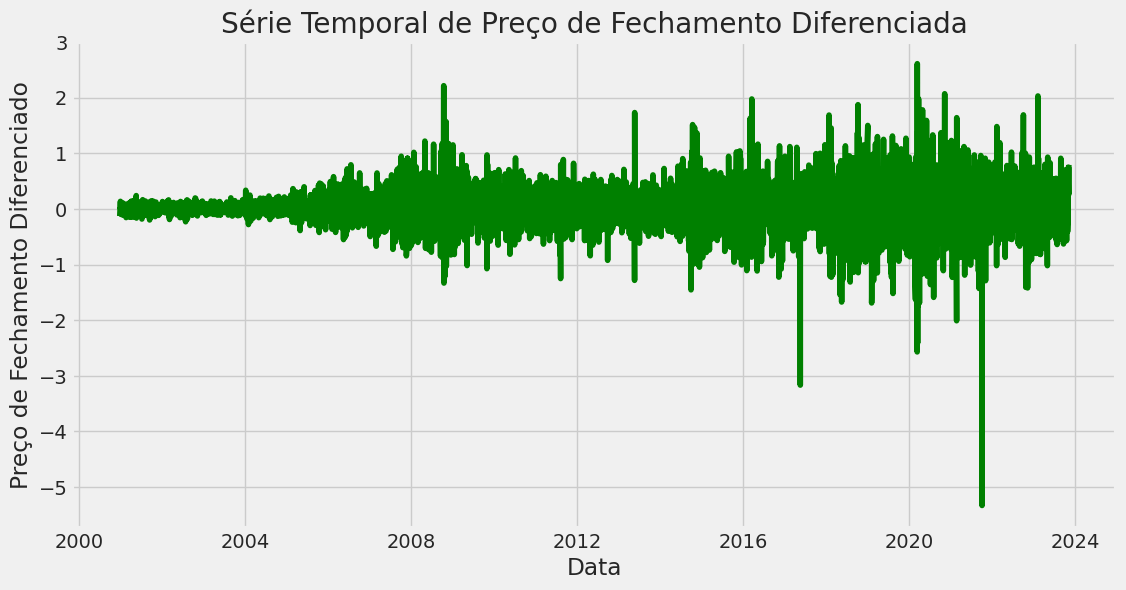

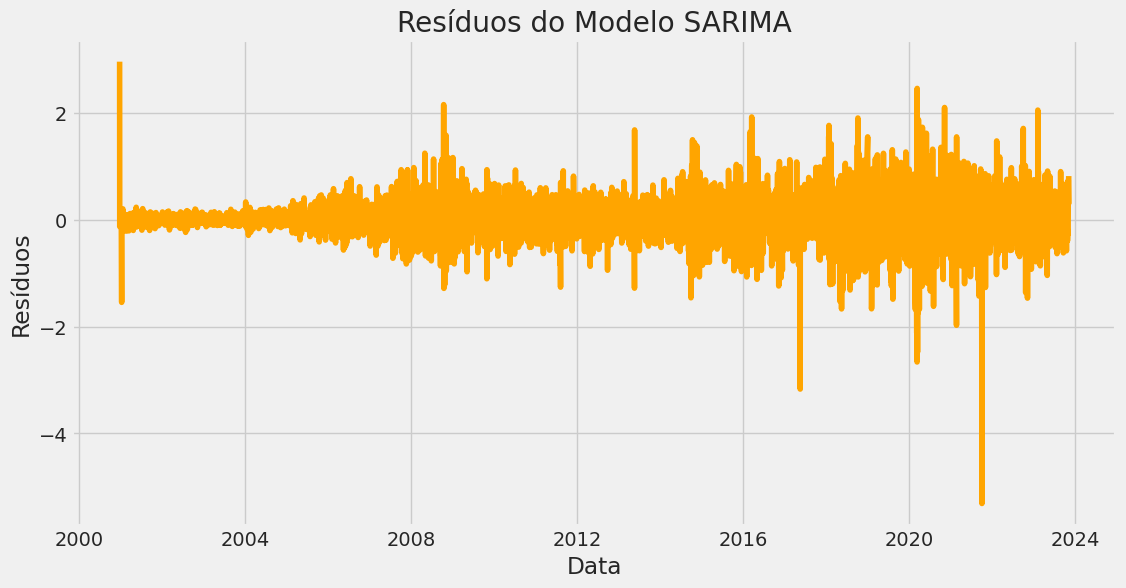

In [45]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


#close_prices = ibov_itub4_D["Close"]
##  SE RODAR DE NOVO RODAR A DATA DA BASE ( DO INICO)
#xibov_itub4_= web.get_data_yahoo('itub4.SA', start='201x-10-01', end='20X3-10-01')

#close_prices = ibov_itub4_D["Close"]


# # Plotar o gráfico de preços de fechamento ao longo do tempo
# plt.figure(figsize=(10,4 ))
# plt.plot(ITUB4['Close'], label='Preço de Fechamento', color='blue')
# plt.title('Série Temporal de Preço de Fechamento')
# plt.xlabel('Data')
# plt.ylabel('Preço de Fechamento')

# Verificar a estacionaridade da série
result = adfuller(ITUB4['Close'])
print(f'ADF Statistic: {result[0]}\n' )
print(f'p-value: {result[1]}\n  \n')


if result[1] <= 0.05:
    print('n A série É estacionária.\n')
else:
    print( ' A série NÃO é estacionária.  \n')


# Realizar a diferenciação para tornar a série estacionária
d = 1
ITUB4_C= ITUB4['Close'].diff(d).dropna()

# Plotar a série diferenciada
plt.figure(figsize=(12, 6))
plt.plot(ITUB4_C, label='Preço de Fechamento (Diferenciado)', color='green')
plt.title('Série Temporal de Preço de Fechamento Diferenciada')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Diferenciado')

# Ajustar o modelo SARIMA

p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12  # Valores de p, d, q, P, D, Q e s para o modelo SARIMA
model = SARIMAX(ITUB4['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()


# Print das estatísticas do modelo
print(model_fit.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
plt.plot(model_fit.resid, label='Resíduos', color='orange')
plt.title('Resíduos do Modelo SARIMA')
plt.xlabel('Data')
plt.ylabel('Resíduos')

plt.show()


# segue horts

In [116]:
colunas = ITUB4_.columns
print(f' ITUB4: {colunas}')

 ITUB4: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [62]:
ITUB4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5738 entries, 2000-12-21 to 2023-11-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5738 non-null   float64
 1   High       5738 non-null   float64
 2   Low        5738 non-null   float64
 3   Close      5738 non-null   float64
 4   Adj Close  5738 non-null   float64
 5   Volume     5738 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 313.8 KB


In [115]:
import yfinance as yf
import datetime

stock_symbol = "ITUB4.SA"
data_inicio = "2013-10-01"
data_fim = "2023-11-06"

data_inicio = datetime.datetime.strptime(data_inicio, "%Y-%m-%d")
data_fim = datetime.datetime.strptime(data_fim, "%Y-%m-%d")

historical_data = yf.download(stock_symbol, start=data_inicio, end=data_fim)
print(historical_data.head(1))



[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ITUB4.SA']: Exception('%ticker%: Invalid input - start date cannot be after end date. startDate = 1699239600, endDate = 1696129200')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [64]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


# Define the stock symbol for Itaú Unibanco Holding S.A. (ticker: ITUB4.SA)
stock_symbol = 'ITUB4.SA'
itau_stock = yf.Ticker(stock_symbol)
stock_symbol = "ITUB4.SA"
data_inicio = "2020-11-07"
data_fim = "2023-11-07"
# Fetch historical stock data

data_inicio = datetime.datetime.strptime(data_inicio, "%Y-%m-%d")
data_fim = datetime.datetime.strptime(data_fim, "%Y-%m-%d")
historical_data = yf.download(stock_symbol, start=data_inicio, end=data_fim)

# Extract the stock closing prices
stock_prices = historical_data['Close'].values

# Calculate Hjorth parameters
def calculate_hjorth_parameters(price_data):
    # Calculate the first derivative of the price data
    price_diff = np.diff(price_data)

    # Calculate the second derivative
    price_diff2 = np.diff(price_diff)

    # Calculate Hjorth parameters
    activity = np.var(price_data)
    mobility = np.sqrt(np.var(price_diff) / activity)
    complexity = np.sqrt(np.var(price_diff2) / np.var(price_diff))

    return activity, mobility, complexity



[*********************100%%**********************]  1 of 1 completed


A mudança hipotética de preço entre as datas de "Nov 06, 2023" e "Nov 07, 2023" é de $0.79 (28.98 - 28.19).  0.79 * 5 = 3.95

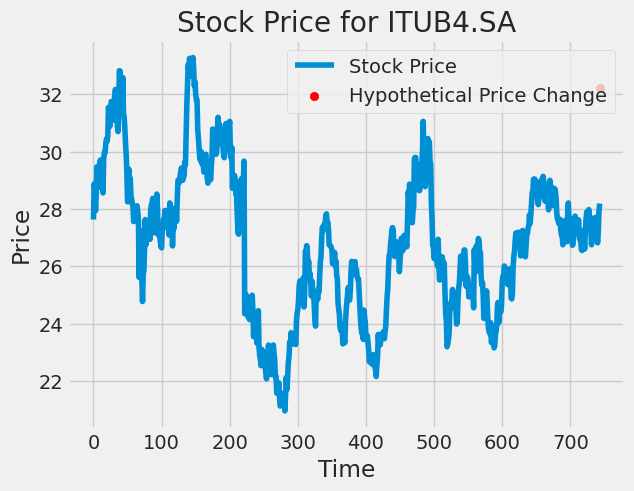

Hjorth Parameters:
Activity: 6.5128734273219155
Mobility: 0.19739669554909228
Complexity: 1.4682774097198392
Prediction: Buy


In [65]:

# Define a hypothetical price change
hypothetical_price_change = 4.05  # Replace with your own hypothetical price change

# Set the prediction threshold
threshold = 0.1

# Predict price change based on Hjorth parameters
def predict_price_change(price_data, threshold):
    activity, mobility, complexity = calculate_hjorth_parameters(price_data)

    if mobility > threshold and complexity > threshold:
        return "Buy"
    elif mobility < threshold and complexity < threshold:
        return "Sell"
    else:
        return "Hold"

# Predict price change
prediction = predict_price_change(stock_prices, threshold)

# Plot stock price data
plt.plot(stock_prices, label='Stock Price')

# Add a point to visualize the hypothetical price change
plt.scatter(len(stock_prices) - 1, stock_prices[-1] + hypothetical_price_change, c='red', marker='o', label='Hypothetical Price Change')

plt.title(f"Stock Price for {stock_symbol}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Retrieve Hjorth parameters
activity, mobility, complexity = calculate_hjorth_parameters(stock_prices)

print("Hjorth Parameters:")
print("Activity:", activity)
print("Mobility:", mobility)
print("Complexity:", complexity)

print("Prediction:", prediction)

#Hjorth análise preditiva comparativa desenhada ITUB4.SA com a rede Long Short-Term Memory (LSTM) como parâmetro

In [66]:
pip install tensorflow

In [67]:
# Define the stock symbol for Itaú Unibanco Holding S.A. (ticker: ITUB4.SA)
stock_symbol = 'ITUB4.SA'

# Fetch historical stock data
itau_stock = yf.Ticker(stock_symbol)
historical_data = itau_stock.history(period="1y")

[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
19/19 [==============================] - 6s 12ms/step - loss: 0.0710
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0110
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 4/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0072
Epoch 5/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0073
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0070
Epoch 7/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0068
Epoch 8/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0069
Epoch 9/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0068
Epoch 10/10
5/5 [==============================] - 1s 5ms/step


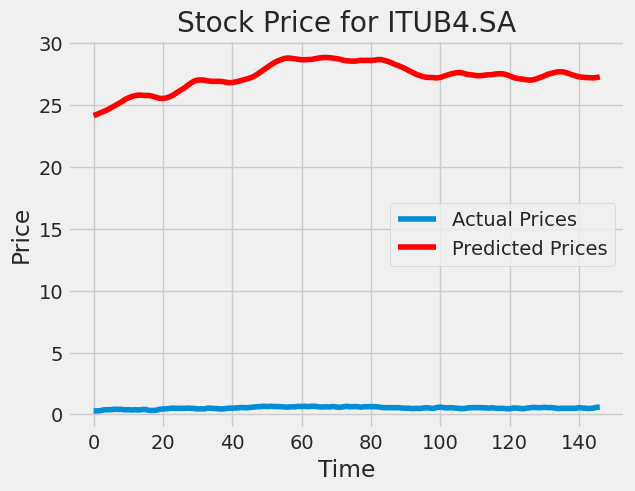

In [68]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

stock_symbol = 'ITUB4.SA'
itau_stock = yf.Ticker(stock_symbol)
stock_symbol = "ITUB4.SA"
data_inicio = "2020-11-07"
data_fim = "2023-11-07"
# Fetch historical stock data

data_inicio = datetime.datetime.strptime(data_inicio, "%Y-%m-%d")
data_fim = datetime.datetime.strptime(data_fim, "%Y-%m-%d")
historical_data = yf.download(stock_symbol, start=data_inicio, end=data_fim)

# Extract the stock closing prices
stock_prices = historical_data['Close'].values
stock_prices = stock_prices.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
stock_prices = scaler.fit_transform(stock_prices)

# Define a hypothetical price change
hypothetical_price_change = 5  # Replace with your own hypothetical price change

# Define the sequence length for the LSTM model
sequence_length = 10

# Create sequences for training
sequences = []
target = []

for i in range(len(stock_prices) - sequence_length):
    sequences.append(stock_prices[i:i + sequence_length])
    target.append(stock_prices[i + sequence_length])

sequences = np.array(sequences)
target = np.array(target)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(sequences) * split_ratio)

X_train = sequences[:split_index]
y_train = target[:split_index]
X_test = sequences[split_index:]
y_test = target[split_index:]

# Build the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions with the model
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot actual and predicted prices
plt.plot(y_test, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', c='red')
plt.title(f"Stock Price for {stock_symbol}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()



O método de análise de séries temporais de Hjorth não especifica um período máximo recomendado em anos. Em vez disso, a escolha do período de dados para análise depende dos objetivos da análise, da natureza dos dados e das características do fenômeno que está sendo estudado.

Normalmente, a seleção do período de dados depende de considerações práticas, como a disponibilidade de dados, a frequência das observações e a quantidade de dados relevantes para a análise. No entanto, é importante levar em consideração que a análise de séries temporais pode ser sensível à escolha do período e que períodos muito longos podem diluir padrões ou tornar a análise menos sensível a mudanças recentes.

Em resumo, não há um período máximo definido para análise de séries

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/10
19/19 [==============================] - 5s 12ms/step - loss: 0.0587
Epoch 2/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0121
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0085
Epoch 4/10
19/19 [==============================] - 0s 14ms/step - loss: 0.0072
Epoch 5/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0068
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0067
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0065
Epoch 8/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0066
Epoch 9/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0066
Epoch 10/10
5/5 [==============================] - 1s 5ms/step


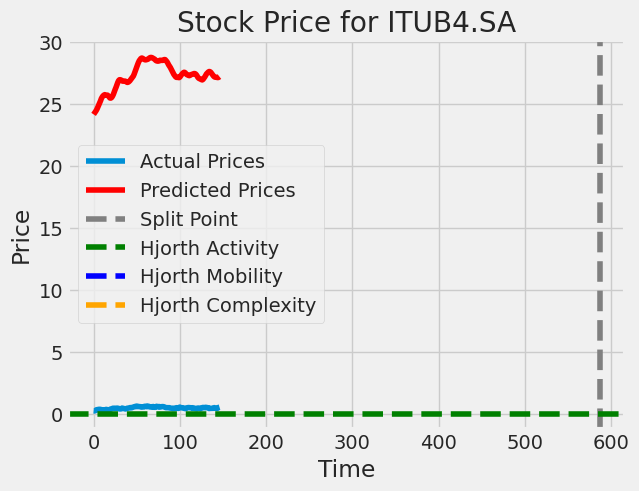

In [69]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

stock_symbol = 'ITUB4.SA'
itau_stock = yf.Ticker(stock_symbol)
stock_symbol = "ITUB4.SA"
data_inicio = "2020-11-07"
data_fim = "2023-11-07"
# Fetch historical stock data

data_inicio = datetime.datetime.strptime(data_inicio, "%Y-%m-%d")
data_fim = datetime.datetime.strptime(data_fim, "%Y-%m-%d")
historical_data = yf.download(stock_symbol, start=data_inicio, end=data_fim)

# Extract the stock closing prices
stock_prices = historical_data['Close'].values
stock_prices = stock_prices.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
stock_prices = scaler.fit_transform(stock_prices)

# Calculate Hjorth parameters
def calculate_hjorth_parameters(price_data):
    price_diff = np.diff(price_data)
    price_diff2 = np.diff(price_diff)
    activity = np.var(price_data)
    mobility = np.sqrt(np.var(price_diff) / activity)
    complexity = np.sqrt(np.var(price_diff2) / np.var(price_diff))
    return activity, mobility, complexity

# Calculate Hjorth parameters for the entire dataset
activity, mobility, complexity = calculate_hjorth_parameters(stock_prices)

# Define a hypothetical price change
hypothetical_price_change = 5  # Replace with your own hypothetical price change

# Define the sequence length for the LSTM model
sequence_length = 10

# Create sequences for training
sequences = []
target = []

for i in range(len(stock_prices) - sequence_length):
    sequences.append(stock_prices[i:i + sequence_length])
    target.append(stock_prices[i + sequence_length])

sequences = np.array(sequences)
target = np.array(target)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(sequences) * split_ratio)

X_train = sequences[:split_index]
y_train = target[:split_index]
X_test = sequences[split_index:]
y_test = target[split_index:]

# Build the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions with the model
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot actual and predicted prices
plt.plot(y_test, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', c='red')
plt.title(f"Stock Price for {stock_symbol}")
plt.xlabel("Time")
plt.ylabel("Price")

# Plot Hjorth parameters
plt.axvline(split_index, color='gray', linestyle='--', label='Split Point')
plt.axhline(activity, color='green', linestyle='--', label='Hjorth Activity')
plt.axhline(mobility, color='blue', linestyle='--', label='Hjorth Mobility')
plt.axhline(complexity, color='orange', linestyle='--', label='Hjorth Complexity')

plt.legend()
plt.show()


In [70]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=54b00ba0a6565359461a04d1e07e8fbf51f5274c3160109bb80cfe349ee159ff
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


Epoch 1/50
13/13 [==============================] - 4s 30ms/step - loss: 0.1094
Epoch 2/50
13/13 [==============================] - 0s 30ms/step - loss: 0.0314
Epoch 3/50
13/13 [==============================] - 0s 29ms/step - loss: 0.0221
Epoch 4/50
13/13 [==============================] - 0s 30ms/step - loss: 0.0201
Epoch 5/50
13/13 [==============================] - 0s 31ms/step - loss: 0.0208
Epoch 6/50
13/13 [==============================] - 1s 44ms/step - loss: 0.0215
Epoch 7/50
13/13 [==============================] - 1s 54ms/step - loss: 0.0228
Epoch 8/50
13/13 [==============================] - 1s 57ms/step - loss: 0.0203
Epoch 9/50
13/13 [==============================] - 0s 29ms/step - loss: 0.0211
Epoch 10/50
13/13 [==============================] - 0s 30ms/step - loss: 0.0226
Epoch 11/50
13/13 [==============================] - 0s 31ms/step - loss: 0.0220
Epoch 12/50
13/13 [==============================] - 0s 30ms/step - loss: 0.0198
Epoch 13/50
13/13 [==================

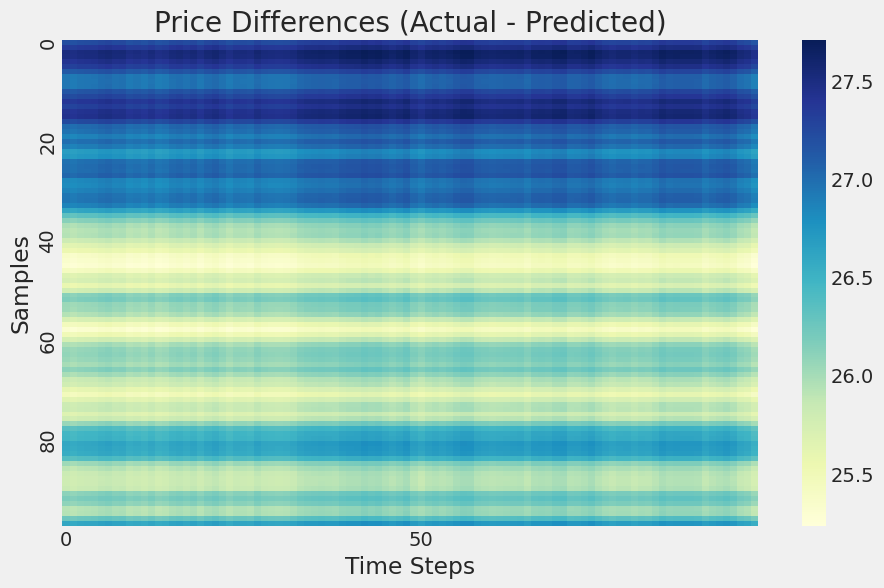

In [71]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Define the stock symbol for Itaú Unibanco Holding S.A. (ticker: ITUB4.SA)
stock_symbol = 'ITUB4.SA'

# Fetch historical stock data
itau_stock = yf.Ticker(stock_symbol)
historical_data = itau_stock.history(period="2y")  # Increased data retrieval to 2 years

# Extract the stock closing prices
stock_prices = historical_data['Close'].values
stock_prices = stock_prices.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
stock_prices = scaler.fit_transform(stock_prices)

# Calculate simple moving averages (SMA) as additional features
sma_50 = historical_data['Close'].rolling(window=50).mean().values
sma_200 = historical_data['Close'].rolling(window=200).mean().values

# Combine the original data with the calculated SMAs
additional_features = np.column_stack((stock_prices, sma_50, sma_200))

# Define a hypothetical price change
hypothetical_price_change = 5  # Replace with your own hypothetical price change

# Define the sequence length for the LSTM model
sequence_length = 10

# Create sequences for training
sequences = []
target = []

for i in range(len(additional_features) - sequence_length):
    sequences.append(additional_features[i:i + sequence_length])
    target.append(additional_features[i + sequence_length, 0])

sequences = np.array(sequences)
target = np.array(target)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(sequences) * split_ratio)

X_train = sequences[:split_index]
y_train = target[:split_index]
X_test = sequences[split_index:]
y_test = target[split_index:]

# Check and impute NaN values in the data
if np.isnan(X_train).any() or np.isnan(y_train).any() or np.isnan(X_test).any() or np.isnan(y_test).any():
    # Impute NaN values with the mean of the column
    X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
    y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))
    X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))
    y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))

# Build a more advanced LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])),
    tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dense(1)
])

# Adjust the learning rate to avoid convergence issues
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with more epochs
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions with the model
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Calculate the absolute differences between actual and predicted prices
price_differences = np.abs(y_test - predicted_prices)

# Create a heatmap to visualize the differences
plt.figure(figsize=(10, 6))
sns.heatmap(price_differences, cmap='YlGnBu', xticklabels=50, yticklabels=20)
plt.title("Price Differences (Actual - Predicted)")
plt.xlabel("Time Steps")
plt.ylabel("Samples")
plt.show()

#Aplicaçcao no modelo preditivo

#mostrar calculo derivada na mao

#mostrar grafico de trend  Eco

In [ ]:
import numpy as np
import pandas as pd

def calculate_hjorth_parameters(price_data):
    # Calculate the first derivative of the price data
    price_diff = np.diff(price_data)
    #frequency = pd.infer_freq(ITUB4.index)


    # Calculate the second derivative
    price_diff2 = np.diff(price_diff)

    # Calculate Hjorth parameters
    activity = np.var(price_data)
    mobility = np.sqrt(np.var(price_diff) / activity)
    complexity = np.sqrt(np.var(price_diff2) / np.var(price_diff))

    return activity, mobility, complexity

def predict_price_change(price_data, threshold=0.1):
    activity, mobility, complexity = calculate_hjorth_parameters(price_data)

    # Simple prediction rule based on Hjorth parameters
    if mobility > threshold and complexity > threshold:
        return "Buy"
    elif mobility < threshold and complexity < threshold:
        return "Sell"
    else:
        return "Hold"

# Sample stock price data (replace with your own data)
stock_prices = [100, 105, 110, 115, 112, 108, 120, 125, 130, 135]

# Set the prediction threshold
threshold = 0.1

# Predict price change
prediction = predict_price_change(stock_prices, threshold)

# Hypothetical future price change
hypothetical_price_change = 5  # Replace with your own hypothetical price change

# Compare the prediction with the hypothetical price change
if prediction == "Buy" and hypothetical_price_change > 0:
    action = "Correct"
elif prediction == "Sell" and hypothetical_price_change < 0:
    action = "Correct"
elif prediction == "Hold" and hypothetical_price_change == 0:
    action = "Correct"
else:
    action = "Incorrect"

print("Hjorth Parameters:")
print("Activity:", activity)
print("Mobility:", mobility)
print("Complexity:", complexity)

print("Prediction:", prediction)
print("Hypothetical Price Change:", hypothetical_price_change)
print("Action:", action)

In [ ]:
mostrar grafico de trend  Eco

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock symbol for Itaú Unibanco Holding S.A. (ticker: ITUB4.SA)
stock_symbol = 'ITUB4.SA'

# Fetch historical stock data
itau_stock = yf.Ticker(stock_symbol)
historical_data = itau_stock.history(period="1y")

# Extract the stock closing prices
stock_prices = historical_data['Close'].values

# Calculate Hjorth parameters
def calculate_hjorth_parameters(price_data):
    # Calculate the first derivative of the price data
    price_diff = np.diff(price_data)

    # Calculate the second derivative
    price_diff2 = np.diff(price_diff)

    # Calculate Hjorth parameters
    activity = np.var(price_data)
    mobility = np.sqrt(np.var(price_diff) / activity)
    complexity = np.sqrt(np.var(price_diff2) / np.var(price_diff))

    return activity, mobility, complexity

# Define a hypothetical price change
hypothetical_price_change = 5  # Replace with your own hypothetical price change

# Set the prediction threshold
threshold = 0.1

# Predict price change based on Hjorth parameters
def predict_price_change(price_data, threshold):
    activity, mobility, complexity = calculate_hjorth_parameters(price_data)

    if mobility > threshold and complexity > threshold:
        return "Buy"
    elif mobility < threshold and complexity < threshold:
        return "Sell"
    else:
        return "Hold"

# Predict price change
prediction = predict_price_change(stock_prices, threshold)

# Plot stock price data
plt.plot(stock_prices, label='Stock Price')

# Add a point to visualize the hypothetical price change
plt.scatter(len(stock_prices) - 1, stock_prices[-1] + hypothetical_price_change, c='red', marker='o', label='Hypothetical Price Change')

plt.title(f"Stock Price for {stock_symbol}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Retrieve Hjorth parameters
activity, mobility, complexity = calculate_hjorth_parameters(stock_prices)

print("Hjorth Parameters:")
print("Activity:", activity)
print("Mobility:", mobility)
print("Complexity:", complexity)

print("Prediction:", prediction)


#trens

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Specify the period based on the seasonality of your data
period = 252  # Assuming yearly seasonality

# Perform seasonal decomposition
result = seasonal_decompose(ITUB4["Close"], period=period)

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
resultado = seasonal_decompose(ITUB4["Close"], period=24)

<Axes: xlabel='Date'>

<Figure size 1200x600 with 0 Axes>

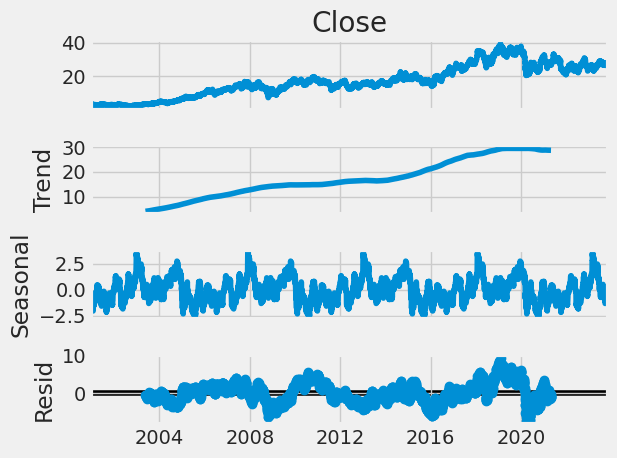

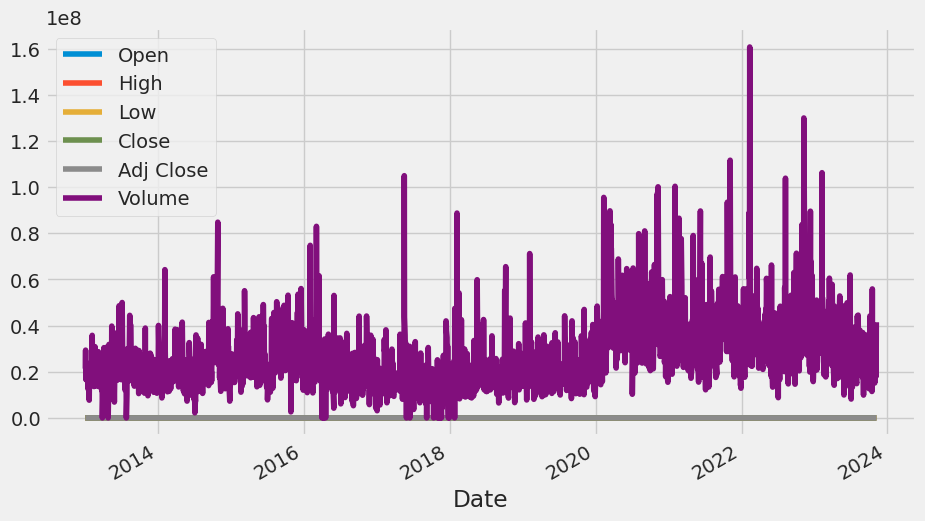

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Specify the period based on the seasonality of your data
period = 1260  # Assuming yearly seasonality  5 anos
# Perform seasonal decomposition
result = seasonal_decompose(ITUB4["Close"], period=period)

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Specify the start and end dates for your plot
# start_date = "2022-10-30"
# end_date = "2023-10-30"

# Plot the decomposed components with specified width and dates
result.plot()
# plt.title(f"Seasonal Decomposition (Start Date: {start_date}, End Date: {end_date})")
df.plot(figsize=(10,6))



<Axes: xlabel='Date'>

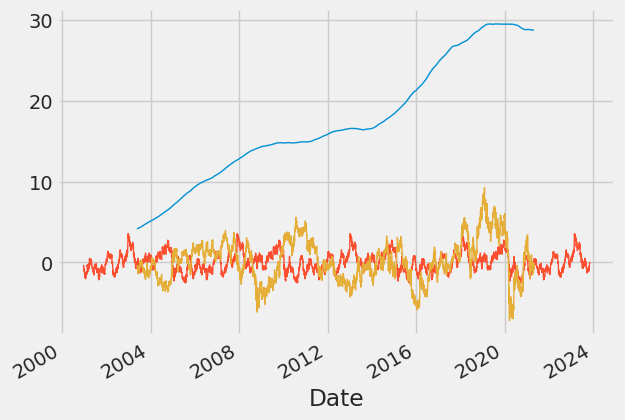

<Figure size 1200x600 with 0 Axes>

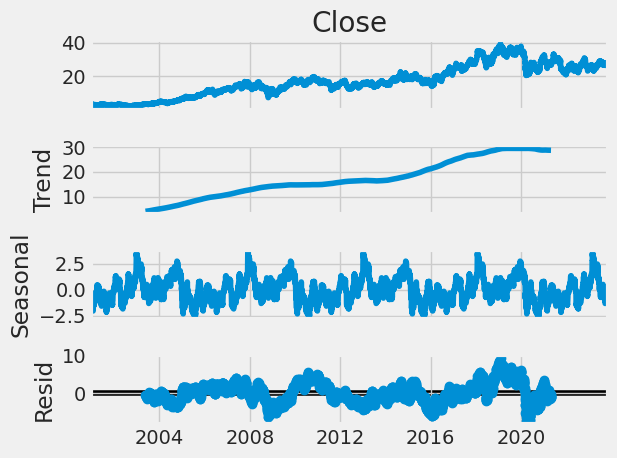

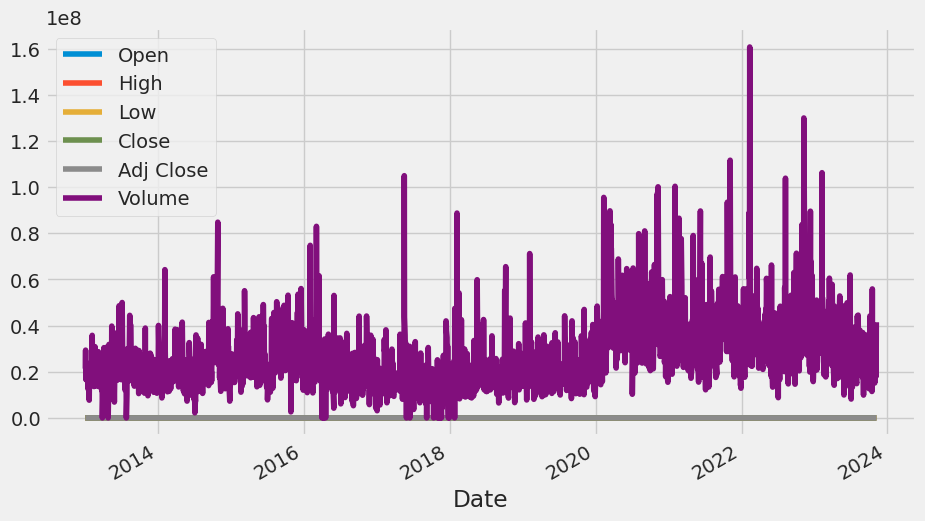

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Specify the period based on the seasonality of your data
period = 1260  # Assuming yearly seasonality  5 anos
# Perform seasonal decomposition
result = seasonal_decompose(ITUB4["Close"], period=period)

# Access the decomposed components
# trend = result.trend
# seasonal = result.seasonal
# residual = result.resid

result.trend.plot(lw=1)
result.seasonal.plot(lw=1)
result.resid.plot(lw=1)


# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Specify the start and end dates for your plot
# start_date = "2022-10-30"
# end_date = "2023-10-30"

# Plot the decomposed components with specified width and dates
result.plot()
# plt.title(f"Seasonal Decomposition (Start Date: {start_date}, End Date: {end_date})")
df.plot(figsize=(10,6))



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas_datareader.data as web
ITUB4 = web.get_data_yahoo('ITUB4.SA')
BBDC4= web.get_data_yahoo('BBDC4.SA')
BBAS3 = web.get_data_yahoo('BBAS3.SA')
BPAC11 = web.get_data_yahoo('BPAC11.SA')


In [ ]:
ITUB4.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-21,2.815505,2.988535,2.815174,2.960552,1.704019,74224
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.630160,23312
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.630160,0
2000-12-26,2.816664,2.834712,2.790006,2.831401,1.629684,7851
2000-12-27,2.881074,2.927437,2.831401,2.927437,1.684961,26996


In [ ]:
dates_unique = ITUB4['Date'].unique()
data_inicio = dates_unique[0]
data_fim = dates_unique[-1]

print(f'Data de início: {data_inicio}')
print(f'Data de fim: {data_fim}')


KeyError: ignored

In [ ]:
data_inicio = ITUB4['Date'].min()
data_fim = ITUB4['Date'].max()

print(f'Data de início: {data_inicio}')
print(f'Data de fim: {data_fim}')

KeyError: ignored

In [ ]:
num_linhas = ITUB4.shape[0]
print(f'O ITUB4 é {num_linhas}')

O ITUB4 é 5738


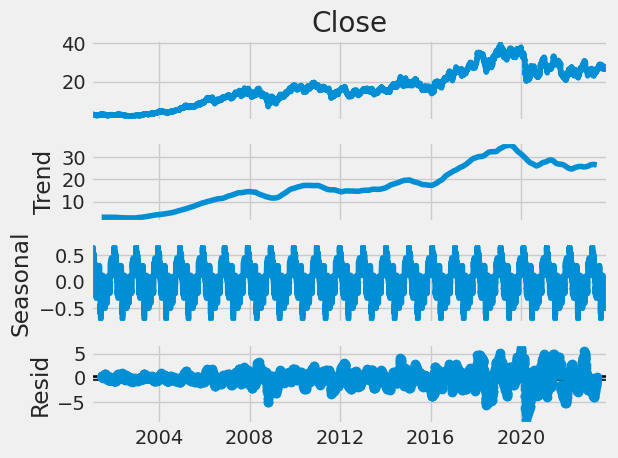

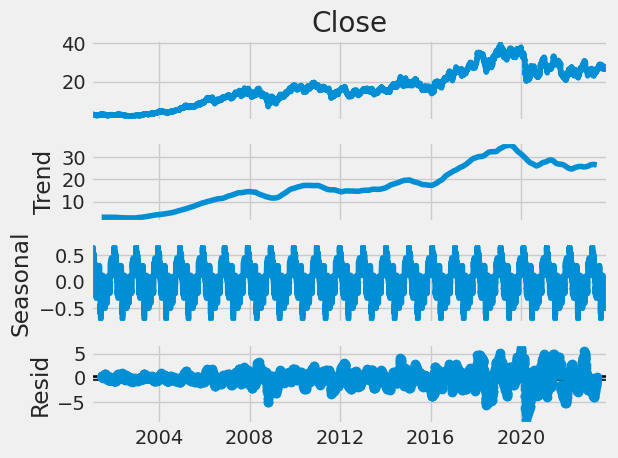

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Specify the period based on the seasonality of your data
period = 252  # Assuming yearly seasonality

# Perform seasonal decomposition
result = seasonal_decompose(ITUB4["Close"], period=period)

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
resultado = seasonal_decompose(ITUB4["Close"], period=12)
result.plot()